1.Any live cell with fewer than two live neighbours dies, as if by underpopulation.<br>
2.Any live cell with two or three live neighbours lives on to the next generation.<br>
3.Any live cell with more than three live neighbours dies, as if by overpopulation.<br>
4.Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

Traceback (most recent call last):
  File "/Users/yons/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/Users/yons/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/Users/yons/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


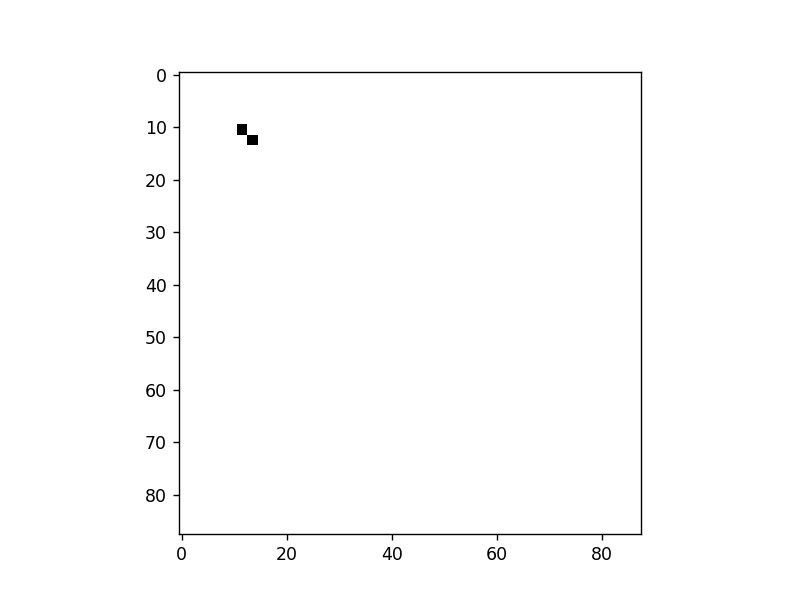

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
universe = np.zeros((88,88))
# print(universe)

beacon=[[1,1,0,0],
        [1,1,0,0],
        [0,0,1,1],
        [0,0,1,1]]

universe[10:14,11:15]=beacon

plt.imshow(universe,cmap="binary")
plt.show()

In [10]:
new_universe=np.copy(universe)

def rule_of_life(x,y):
    number_of_neighbours=np.sum(universe[x-1:x+2,y-1:y+2])-universe[x,y]
    
    if universe[x,y]==1:
        if number_of_neighbours<2 or number_of_neighbours>3:
            new_universe[x,y]==0
    elif universe[x,y]==0:
        if number_of_neighbours==3:
            new_universe[x,y]==0

In [15]:
def judgement_day():
    global universe
    
   
    
    for i in range(universe.shape[0]):
        for j in range(universe.shape[1]):
            rule_of_life(i,j)
    
    universe=np.copy(new_universe)
    

<IPython.core.display.Javascript object>


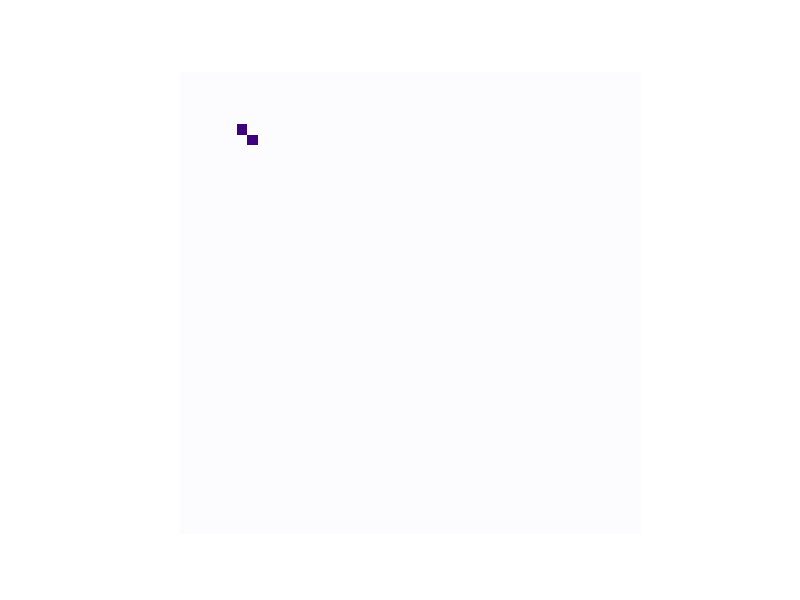

In [16]:
import matplotlib.animation as animation

fig = plt.figure()

# Remove the axes for aesthetics
plt.axis('off')
ims = []

for i in range(30):
    # Add a snapshot of the universe, then move to the next generation
    ims.append((plt.imshow(universe, cmap='Purples'),))
    judgement_day()

# Create the animation
im_ani = animation.ArtistAnimation(fig, ims, interval=700,
repeat_delay=1000, blit=True)